In [1869]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tools import eval_measures
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge 

# Question 1. Reading in datasets

In [1445]:
train_data = pd.read_csv('train_2017.csv')
property_data = pd.read_csv('properties_2017.csv', low_memory=False)

In [1446]:
train_data = pd.merge(train_data, property_data, how = "inner", on = ["parcelid"])

# Question 2. Split the dataset

In [1447]:
training, test = train_test_split(train_data, test_size=0.3, train_size=0.7)

# Question 3. Data cleaning

In [1448]:
#missing = 
train_data.isna().any()
#missing[missing == True]

parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                      True
bedroomcnt                       True
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                             True
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsystemtypeid            True
latitude    

### Looking at this information, I can tell all but the first three rows are missing some data. For the columns that are missing data, I will find the mean of that column to fill in any missing values. Before filling each column its mean, I want to see if any columns are missing a significant amount of information - if so, they could be useless or detrimental to the model.

### Now, I want to see how much data each column is missing. If a columns is missing a significant amount of values, I will drop from my dataset. 

In [1449]:
missing_df = train_data.isna().sum().to_frame().reset_index()
missing_df.columns = ['column name','missing values'] 
missing_df = missing_df.loc[missing_df['missing values']>0] 
missing_df.sort_values(by='missing values',ascending=True,inplace=True) 
missing_df

,column name,missing values
34,propertycountylandusecode,34
6,bathroomcnt,34
7,bedroomcnt,34
54,assessmentyear,34
37,rawcensustractandblock,34
27,longitude,34
26,latitude,34
39,regionidcounty,34
19,fips,34
35,propertylandusetypeid,34


### Looking at this information, there are some columns missing tons of data. Some of these columns have no data to note the absence of a house feature - like poolcnt. Using the data dictionary, I know that column notes how many pools a house has, I believe it is safe to assume those missing values signify a 0, aka, there are no pools on the property. For the other columns that are similar to poolcnt, I will fill in their missing values with a 0 to note the lack of a feature. 

In [1450]:
training['poolcnt'] = training['poolcnt'].fillna(0)
training['pooltypeid7'] = training['pooltypeid7'].fillna(0)
training['fireplacecnt'] = training['fireplacecnt'].fillna(0)
training['basementsqft'] = training['basementsqft'].fillna(0)
training['yardbuildingsqft26'] = training['yardbuildingsqft26'].fillna(0)
training['fireplaceflag'] = training['fireplaceflag'].fillna(0)
training['pooltypeid10'] = training['pooltypeid10'].fillna(0)
training['decktypeid'] = training['decktypeid'].fillna(0)
training['poolsizesum'] = training['poolsizesum'].fillna(0)
training['pooltypeid2'] = training['pooltypeid2'].fillna(0)
training['hashottuborspa'] = training['hashottuborspa'].fillna(0)
training['yardbuildingsqft17'] = training['yardbuildingsqft17'].fillna(0)

In [1451]:
test['poolcnt'] = test['poolcnt'].fillna(0)
test['pooltypeid7'] = test['pooltypeid7'].fillna(0)
test['fireplacecnt'] = test['fireplacecnt'].fillna(0)
test['basementsqft'] = test['basementsqft'].fillna(0)
test['yardbuildingsqft26'] = test['yardbuildingsqft26'].fillna(0)
test['fireplaceflag'] = test['fireplaceflag'].fillna(0)
test['pooltypeid10'] = test['pooltypeid10'].fillna(0)
test['decktypeid'] = test['decktypeid'].fillna(0)
test['poolsizesum'] = test['poolsizesum'].fillna(0)
test['pooltypeid2'] = test['pooltypeid2'].fillna(0)
test['hashottuborspa'] = test['hashottuborspa'].fillna(0)
test['yardbuildingsqft17'] = test['yardbuildingsqft17'].fillna(0)

<ipython-input-1451-3f07bc3fc4b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['poolcnt'] = test['poolcnt'].fillna(0)
<ipython-input-1451-3f07bc3fc4b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pooltypeid7'] = test['pooltypeid7'].fillna(0)
<ipython-input-1451-3f07bc3fc4b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

### Now that I have filled in the value of 0 for rows that are lacking those features, I want to see what rows left are missing a high proportion of data to drop them from the dataframe.  

In [1452]:
missingvalues_prop = (training.isnull().sum()/len(training)).reset_index()
missingvalues_prop.columns = ['name','proportion']
missingvalues_prop = missingvalues_prop.sort_values (by = 'proportion', ascending=False)
y = missingvalues_prop[missingvalues_prop['proportion']>.70]
print(y)
y = y.name.values
print(y)

                        name  proportion
8        buildingclasstypeid    0.999834
15      finishedsquarefeet13    0.999466
43               storytypeid    0.999356
4   architecturalstyletypeid    0.997313
45    typeconstructiontypeid    0.997147
18       finishedsquarefeet6    0.994993
58        taxdelinquencyyear    0.962433
57        taxdelinquencyflag    0.962433
16      finishedsquarefeet15    0.960389
17      finishedsquarefeet50    0.921699
12  finishedfloor1squarefeet    0.921699
44       threequarterbathnbr    0.869407
50           numberofstories    0.773491
['buildingclasstypeid' 'finishedsquarefeet13' 'storytypeid'
 'architecturalstyletypeid' 'typeconstructiontypeid' 'finishedsquarefeet6'
 'taxdelinquencyyear' 'taxdelinquencyflag' 'finishedsquarefeet15'
 'finishedsquarefeet50' 'finishedfloor1squarefeet' 'threequarterbathnbr'
 'numberofstories']


In [1453]:
training = training.drop(y,axis=1)
test = test.drop(y,axis=1)

In [1454]:
training.isna().any()

parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid            True
basementsqft                    False
bathroomcnt                      True
bedroomcnt                       True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                      False
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
fips                             True
fireplacecnt                    False
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                  False
heatingorsystemtypeid            True
latitude                         True
longitude                        True
lotsizesquarefeet                True
poolcnt                         False
poolsizesum                     False
pooltypeid10                    False
pooltypeid2                     False
pooltypeid7 

In [1455]:
test.isna().any()

parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid            True
basementsqft                    False
bathroomcnt                      True
bedroomcnt                       True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                      False
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
fips                             True
fireplacecnt                    False
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                  False
heatingorsystemtypeid            True
latitude                         True
longitude                        True
lotsizesquarefeet                True
poolcnt                         False
poolsizesum                     False
pooltypeid10                    False
pooltypeid2                     False
pooltypeid7 

### After dropping columns with a high proportion of missing values, I will now fill in all other columns missing data with that columns mean.

In [1456]:
cols = training.columns
means = training[cols].mean() 
training[cols] = training[cols].fillna(means)
test[cols] = test[cols].fillna(means)

### Now all columns, save for a few object type columns, are fully filled out. Now that the data is cleaned, I will begin the selection process. 

# Question 4. Choosing variables & beginning Lasso regression.

#### To choose my variables, I want to first view the correlations of the variables. Before looking at the correlations, I am aware some will be highly correlated and are able to be dropped. For example, bathroomcnt and fullbathcnt will be highly correlated, therefore, both variables will not need to be used for the model.  

In [1459]:
training.corr()

,parcelid,logerror,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,...,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
parcelid,1.000000,0.019743,9.456012e-02,2.069282e-02,0.007769,0.010445,-3.418392e-02,0.017003,1.057870e-01,0.028337,...,8.425646e-03,1.615116e-01,2.856060e-02,0.132865,0.040339,0.018125,NaN,0.006028,0.008626,0.050781
logerror,0.019743,1.000000,5.172674e-03,7.477527e-03,0.027665,0.030020,-7.708583e-03,0.029663,-1.889376e-03,0.038362,...,1.048597e-03,-8.389817e-03,-2.066950e-03,0.007247,0.006725,0.005797,NaN,0.004473,0.004107,0.005157
airconditioningtypeid,0.094560,0.005173,1.000000e+00,9.777823e-18,-0.023403,0.046578,-9.590971e-02,-0.023104,1.737337e-16,0.032759,...,1.517437e-02,-2.026841e-16,7.794001e-18,-0.033046,-0.039005,-0.006526,NaN,0.009072,-0.022075,0.016228
basementsqft,0.020693,0.007478,9.777823e-18,1.000000e+00,0.031160,0.014398,-2.873465e-17,0.031505,7.707400e-02,0.015557,...,-1.111544e-17,1.850057e-02,1.582607e-02,0.000570,0.005888,0.009344,NaN,0.009587,0.007480,0.005938
bathroomcnt,0.007769,0.027665,-2.340300e-02,3.116024e-02,1.000000,0.633112,4.341117e-01,0.978931,5.047235e-02,0.764671,...,3.867231e-02,5.147375e-02,9.242312e-03,0.372050,0.560957,0.461426,NaN,0.351124,0.465809,0.001068
bedroomcnt,0.010445,0.030020,4.657786e-02,1.439849e-02,0.633112,1.000000,8.898672e-02,0.598410,2.016246e-02,0.620913,...,6.609166e-02,7.184902e-02,-1.326951e-03,0.046290,0.293205,0.240775,NaN,0.182853,0.247043,0.008329
buildingqualitytypeid,-0.034184,-0.007709,-9.590971e-02,-2.873465e-17,0.434112,0.088987,1.000000e+00,0.440773,-2.698602e-16,0.316128,...,-6.233406e-02,5.336997e-17,-3.835196e-17,0.476658,0.313612,0.250808,NaN,0.186855,0.254145,-0.001576
calculatedbathnbr,0.017003,0.029663,-2.310379e-02,3.150547e-02,0.978931,0.598410,4.407725e-01,1.000000,4.988919e-02,0.791815,...,6.688271e-02,5.130637e-02,8.987347e-03,0.374227,0.580454,0.478456,NaN,0.364911,0.483129,0.002318
decktypeid,0.105787,-0.001889,1.737337e-16,7.707400e-02,0.050472,0.020162,-2.698602e-16,0.049889,1.000000e+00,0.061666,...,1.638984e-04,1.527943e-01,8.682189e-02,0.063550,0.044567,0.027628,NaN,0.016016,0.021269,0.030395
calculatedfinishedsquarefeet,0.028337,0.038362,3.275867e-02,1.555743e-02,0.764671,0.620913,3.161283e-01,0.791815,6.166579e-02,1.000000,...,7.333688e-02,8.634568e-02,1.691384e-02,0.215935,0.681197,0.579544,NaN,0.452046,0.582177,0.005608


#### That correlation dataframe is hard to read, so I want to make a graph instead. 

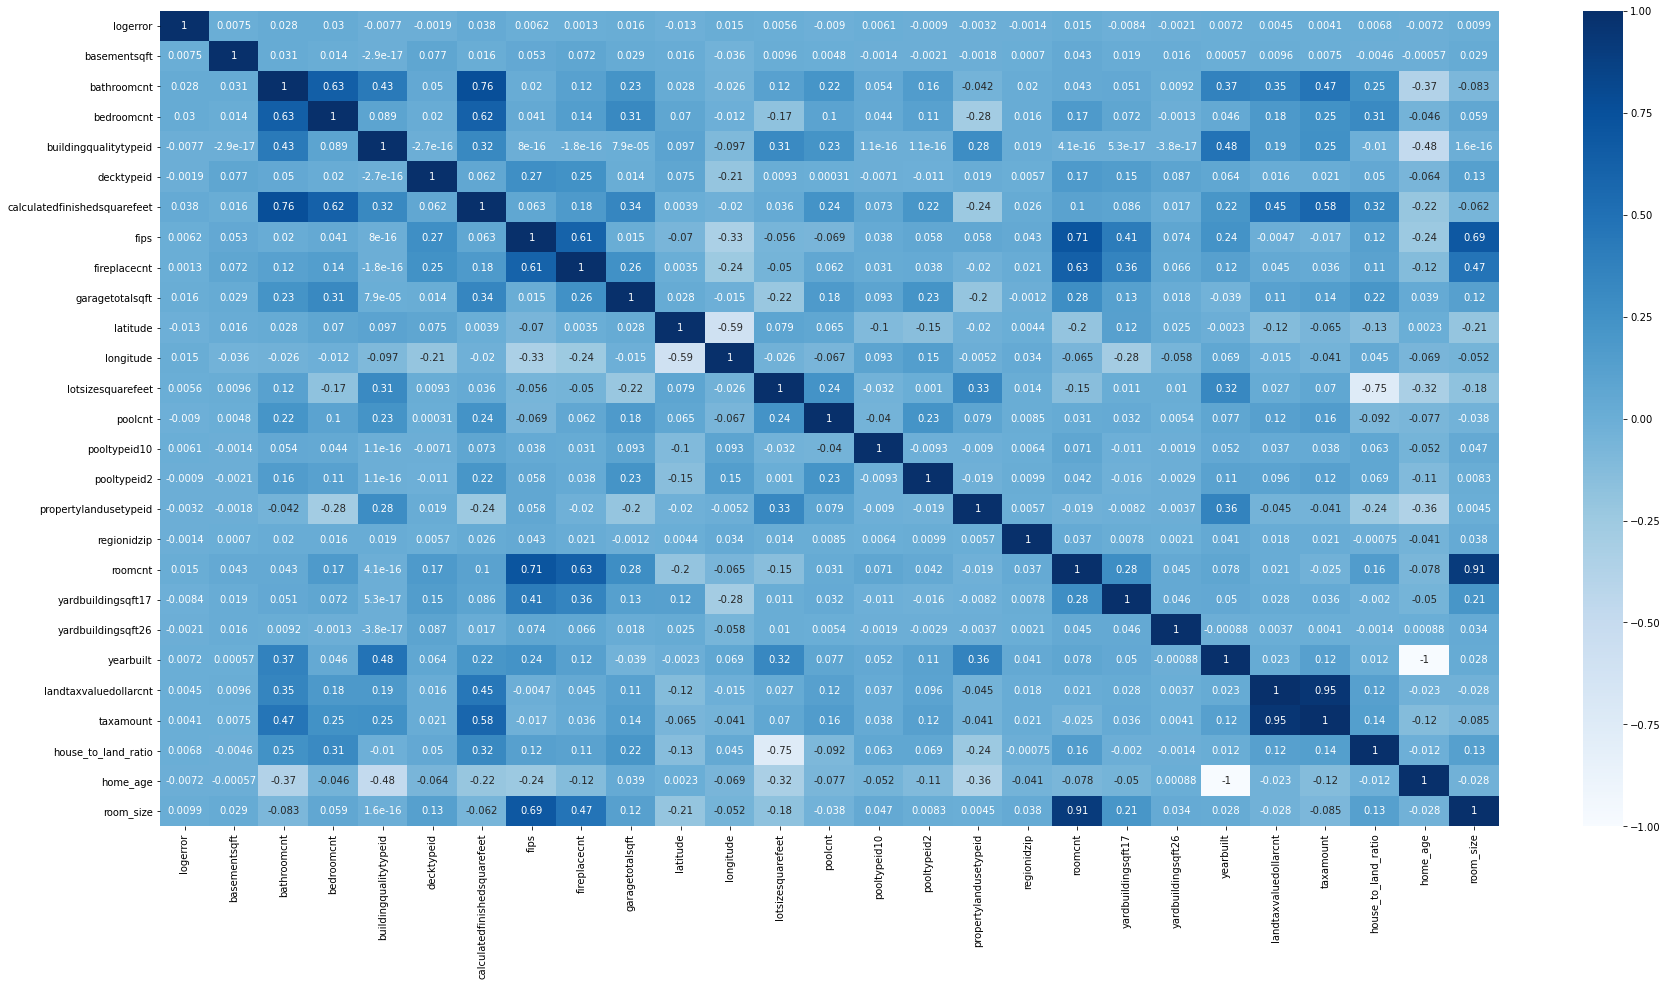

In [2372]:
plt.figure(figsize=(30,15))
corr = training.corr()
sb.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

### Using seaborn, I made a heat map to show the levels of correlation between variables. Using this information, I can find which columns to drop from the dataframe. I listed the columns to drop under a variable "todrop." These columns were chosen because they have a high correlation with another variable, are a unique identifier (parcelid), and some are object type variables.

In [1461]:
todrop=['parcelid','transactiondate','hashottuborspa','fireplaceflag','airconditioningtypeid','calculatedbathnbr','finishedsquarefeet12','fullbathcnt','garagecarcnt','heatingorsystemtypeid','poolsizesum','pooltypeid7','rawcensustractandblock','unitcnt','structuretaxvaluedollarcnt','taxvaluedollarcnt','assessmentyear','censustractandblock', 'propertyzoningdesc','regionidcounty','regionidcity','regionidneighborhood','propertycountylandusecode']

In [1462]:
training = training.drop(todrop, axis=1)
test=test.drop(todrop,axis=1)

In [1463]:
cols = training.columns
colssanslogerror = cols.drop(['logerror'])
print(colssanslogerror)
x = training[colssanslogerror]
y= training['logerror']
print(y)

Index(['basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'decktypeid', 'calculatedfinishedsquarefeet', 'fips', 'fireplacecnt',
       'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'pooltypeid10', 'pooltypeid2', 'propertylandusetypeid',
       'regionidzip', 'roomcnt', 'yardbuildingsqft17', 'yardbuildingsqft26',
       'yearbuilt', 'landtaxvaluedollarcnt', 'taxamount'],
      dtype='object')
59485   -0.011025
59820   -0.077757
34477   -0.023231
39678    0.040661
23474    0.093538
           ...   
48145    0.044130
2765     0.052004
11726   -0.019020
5784     0.021881
66458   -0.029177
Name: logerror, Length: 54329, dtype: float64


In [1464]:
lasso = LassoCV(cv=5, normalize=True, random_state=13)

In [1465]:
lasso = lasso.fit(x, y)

In [1466]:
optimized_alpha = lasso.alpha_
print('The optimized alpha decided by the lasso regression is,',optimized_alpha)

The optimized alpha decided by the lasso regression is, 9.157286524204395e-07


In [1467]:
r2 = lasso.score(x,y)
print('The R Squared value is,', r2)

The R Squared value is, 0.0041418017359191595


In [1468]:
lassologpred = lasso.predict(x)
lassologpred

array([ 0.0070235 , -0.00369617,  0.00673886, ...,  0.02273793,
        0.00354967,  0.02130287])

In [1469]:
meanabserror=MAE(y,lassologpred)
print('The MAE is,', meanabserror)

The MAE is, 0.07027585457417922


In [1470]:
rmse = eval_measures.rmse(y, lassologpred)
print('The RMSE is,', rmse )

The RMSE is, 0.16956332059404058


# Question 5. Ridge regression & comparsion

In [1471]:
ridge = Ridge(normalize=True)

In [1472]:
ridge = ridge.fit(x, y)

In [1473]:
r2r = ridge.score(x,y)
print('The R Squared value is,', r2r)

The R Squared value is, 0.0024737332900380826


In [1474]:
ridgelogpred = ridge.predict(x)
ridgelogpred

array([0.01235213, 0.00653423, 0.01054477, ..., 0.0202754 , 0.01169412,
       0.01896665])

In [1475]:
rmeanabserror=MAE(y,ridgelogpred)
print('The MAE is,', rmeanabserror)

The MAE is, 0.07022163549707341


In [1476]:
rrmse = eval_measures.rmse(y, ridgelogpred)
print('The RMSE is,', rrmse )

The RMSE is, 0.1697052709657008


In [1477]:
r2dif = r2 - r2r
maedif = meanabserror - rmeanabserror
rmsedif = rrmse - rmse

In [2373]:
print('Looking at the two regressions made, the Lasso regression faired better in two of the evaluation metrics calculated. The Lasso regression had a higher R^2 by,', r2dif,'. The Lasso regression also had a near nominally higher MAE by,',maedif,'. However, the Ridge regression had a higher RMSE score between the median of logerror values with predicted logerror values, with a difference of,',rmsedif,'. Comparing the two regressions, I wouldn not say that one is better than the other necessarily because of the similar model performance. I would suspect with more feature engineering, the lasso regression would have higher performance because of its feature of coefficient shrinking when needed.' )

Looking at the two regressions made, the Lasso regression faired better in two of the evaluation metrics calculated. The Lasso regression had a higher R^2 by, 0.0016680684458810768 . The Lasso regression also had a near nominally higher MAE by, 5.4219077105802094e-05 . However, the Ridge regression had a higher RMSE score between the median of logerror values with predicted logerror values, with a difference of, 0.0001419503716602044 . Comparing the two regressions, I wouldn not say that one is better than the other necessarily because of the similar model performance. I would suspect with more feature engineering, the lasso regression would have higher performance because of its feature of coefficient shrinking when needed.


# Question 6. New features for modeling & trying again with model

### 6.a) From a technical perspective, I would model measure performance based on improvements in terms of statistical metrics. Specifically, I would look at the RMSE between using our training set's median as x and the training set's logerrors as y, and using training set's median and our predicted logerror values. This would compare the model's performance by using the training median as a prediction to our model's actual prediction. I would suspect that a smaller RMSE using our models would show that the model has a basis for positive performance.

### 6.b) In a non-technical way, I would say that we are measuring our model's performance based on how accurately it can predict house prices. As the logerror is the difference from Zillow's zestimate and the actual sell price, we are trying to build a model that minimizes the logerror value. High performance would allow for the model to make estimates of housing prices, and once the house is sold, a smaller logerror would be computed.

#### Creating new variable - ratio of how big a house is on how big the lot is. I believe this could be a useful variable as I understand a large yard can be an attractive house feature.

In [1479]:
training['house_to_land_ratio'] = (training['calculatedfinishedsquarefeet']/training['lotsizesquarefeet'])
test['house_to_land_ratio'] = (test['calculatedfinishedsquarefeet']/test['lotsizesquarefeet'])

In [1480]:
cols = training.columns
colssanslogerror = cols.drop(['logerror'])
x = training[colssanslogerror]
y= training['logerror']
print(x.columns, y)

Index(['basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'decktypeid', 'calculatedfinishedsquarefeet', 'fips', 'fireplacecnt',
       'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'pooltypeid10', 'pooltypeid2', 'propertylandusetypeid',
       'regionidzip', 'roomcnt', 'yardbuildingsqft17', 'yardbuildingsqft26',
       'yearbuilt', 'landtaxvaluedollarcnt', 'taxamount',
       'house_to_land_ratio'],
      dtype='object') 59485   -0.011025
59820   -0.077757
34477   -0.023231
39678    0.040661
23474    0.093538
           ...   
48145    0.044130
2765     0.052004
11726   -0.019020
5784     0.021881
66458   -0.029177
Name: logerror, Length: 54329, dtype: float64


In [1481]:
lasso = LassoCV(cv=5, normalize=True, random_state=13)
lasso = lasso.fit(x, y)

In [1482]:
optimized_alpha = lasso.alpha_
print('The optimized alpha decided by the lasso regression is,',optimized_alpha)

The optimized alpha decided by the lasso regression is, 7.964540821112041e-07


In [1483]:
r2 = lasso.score(x,y)
print('The R Squared value is,', r2)
lassologpred = lasso.predict(x)
meanabserror=MAE(y,lassologpred)
print('The MAE is,', meanabserror)
rmse = eval_measures.rmse(y, lassologpred)
print('The RMSE is,', rmse )

The R Squared value is, 0.004311396138282908
The MAE is, 0.07028821066783018
The RMSE is, 0.16954888168371157


#### Instead of looking at the year a home was built, I will engineer to show the age of a house instead.  I would expect newer houses to be sold for higher prices. After running this, model performance did not really improve. There's many reasons why that could've happened. Maybe newer houses are built as "starter homes," which are normally cheaper, or maybe older houses have features that newer houses can't have (larger property sizes, beachfront access, etc).

In [1484]:
training['home_age'] = (2021 - training['yearbuilt'])
test['home_age'] = (2021 - test['yearbuilt'])

In [1485]:
x = training.drop(['logerror','yearbuilt'], axis=1)

In [1486]:
lasso = LassoCV(cv=5, normalize=True, random_state=13)
lasso = lasso.fit(x, y)

In [1487]:
optimized_alpha = lasso.alpha_
print('The optimized alpha decided by the lasso regression is,',optimized_alpha)

The optimized alpha decided by the lasso regression is, 7.964540821112041e-07


In [1488]:
r2 = lasso.score(x,y)
print('The R Squared value is,', r2)
lassologpred = lasso.predict(x)
meanabserror=MAE(y,lassologpred)
print('The MAE is,', meanabserror)
rmse = eval_measures.rmse(y, lassologpred)
print('The RMSE is,', rmse )

The R Squared value is, 0.004311387666539046
The MAE is, 0.07028821421605713
The RMSE is, 0.1695488824050087


In [1489]:
mean = training.lotsizesquarefeet.mean()
median = training.lotsizesquarefeet.median()
print(mean, median)

29855.39715903297 7583.0


#### Next, I explore the lotsizesquarefeet variable. In the lines below, I can see that the data varies greatly and is highly skewed to the righ and there is a max of over 600,000 square feet. That doesn't sound correct and an outlier like that gives reason to the variable being highly skewed. After running this, the model performance didn't improve as much as I expected due to how skewed the series was. I believe that engineering this series from a skew of 25.23 to .21 is an acheivement though.

In [1490]:
print(training.lotsizesquarefeet.agg(['skew']).transpose(),
training.lotsizesquarefeet.describe())

skew    25.232324
Name: lotsizesquarefeet, dtype: float64 count    5.432900e+04
mean     2.985540e+04
std      1.120917e+05
min      2.360000e+02
25%      5.964000e+03
50%      7.583000e+03
75%      2.194900e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64


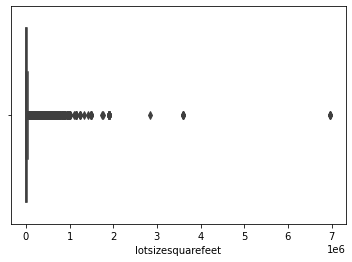

In [1491]:
sb.boxplot(data=training,x=training['lotsizesquarefeet'])

In [1492]:
print(training['lotsizesquarefeet'].quantile(0.90))
print(training['lotsizesquarefeet'].quantile(0.10))
#I look to see what value defines the 90th percentile and set that to be the max possible value in this series. 
#Because this series was so skewed to the right, I do not adjust the minimum lotsizesquarefeet.
training["lotsizesquarefeet"] = np.where(training["lotsizesquarefeet"] >40056, 40056,training['lotsizesquarefeet'])
training['lotsizesquarefeet'] = np.log(training['lotsizesquarefeet'])
print(training.lotsizesquarefeet.agg(['skew']).transpose(), training.lotsizesquarefeet.describe())

40543.0
4409.0
skew    0.21721
Name: lotsizesquarefeet, dtype: float64 count    54329.000000
mean         9.202042
std          0.831670
min          5.463832
25%          8.693497
50%          8.933664
75%          9.996477
max         10.598034
Name: lotsizesquarefeet, dtype: float64


In [1493]:
x = training.drop(['logerror','yearbuilt'], axis=1)

In [1494]:
lasso = LassoCV(cv=5, normalize=True, random_state=13)
lasso = lasso.fit(x, y)

In [1495]:
optimized_alpha = lasso.alpha_
print('The optimized alpha decided by the lasso regression is,',optimized_alpha)

The optimized alpha decided by the lasso regression is, 9.819058182461194e-07


In [1496]:
r2 = lasso.score(x,y)
print('The R Squared value is,', r2)
lassologpred = lasso.predict(x)
meanabserror=MAE(y,lassologpred)
print('The MAE is,', meanabserror)
rmse = eval_measures.rmse(y, lassologpred)
print('The RMSE is,', rmse )

The R Squared value is, 0.004113830588662215
The MAE is, 0.07025284583927115
The RMSE is, 0.16956570188051015


#### I decided to create another new variable - room size. I create this variable by taking roomcnt / calculatedfinishedsquare feet. 

In [1497]:
training['room_size'] = (training['roomcnt']/training['calculatedfinishedsquarefeet'])
test['room_size'] = (test['roomcnt']/test['calculatedfinishedsquarefeet'])

In [1498]:
x = training.drop(['lotsizesquarefeet','logerror','yearbuilt','roomcnt'], axis=1)

In [1499]:
lasso = LassoCV(cv=5, normalize=True, random_state=13)
lasso = lasso.fit(x, y)

In [1500]:
optimized_alpha = lasso.alpha_
print('The optimized alpha decided by the lasso regression is,',optimized_alpha)
r2 = lasso.score(x,y)
print('The R Squared value is,', r2)
lassologpred = lasso.predict(x)
meanabserror=MAE(y,lassologpred)
print('The MAE is,', meanabserror)
rmse = eval_measures.rmse(y, lassologpred)
print('The RMSE is,', rmse )

The optimized alpha decided by the lasso regression is, 7.427757426157103e-07
The R Squared value is, 0.004227303423090634
The MAE is, 0.07027375100228994
The RMSE is, 0.1695560413141087


In [1501]:
eval_measures.rmse(training.logerror.median(), training.logerror)

0.1702062044473125

In [1502]:
eval_measures.rmse(training.logerror.median(), lassologpred)

0.014151972056468228

#### After playing with feature engineering for hours, this is the best I can do. From the original lasso regression, I computed an RMSE of 0.16956332059404058. With my feature engineering, I was able to get an RMSE of 0.16954888168371157, for a difference of 1.4438910329012122e-05. Looking at the difference between the RMSE using median and actual logerror and median and predicted log error, I was able to reduce the RMSE by 0.15605423239084426, showing that the model has some benefit. As previously discussed, this performance improvement seems really nominal, however applying this on a large platform like Zillow could have make a true difference in their 'zestimate.'

# Part 2.

In [2374]:
from sklearn.linear_model import LogisticRegression as LG
from sklearn.linear_model import LogisticRegressionCV as LGCV
from sklearn import metrics

## Question 1. Read in - report shape, missing columns, freq. of target field. 

In [2375]:
churn = pd.read_csv('churn_data.csv')

In [2376]:
print(churn.shape, churn.isna().any(), churn.Churn.describe(), sep='\n')

(7043, 21)
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool
count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object


### There are 7043 rows and 21 columns. No columns are missing values. The top field in the churn series is "No" with a frequency of 5174 out of 7043 instances. 

## Question 2. Do a 70/30 split 

In [2377]:
train_data, test_data = train_test_split(churn, test_size = 0.3, random_state = 13)

## Question 3. Cleaning  

In [2378]:
#cutting off the customer ID columns, which is unique to all, and the . 
x_train = train_data.iloc[:, 1:-1]
x_val = test_data.iloc[:, 1:-1]


y_train = train_data.Churn
y_val = test_data.Churn

#We are lucky to use this dataset as no values are missing and we do not 
#have to clean the data in that sense. 

In [2379]:
x_train['TotalCharges'] = pd.to_numeric(x_train['TotalCharges'], errors = 'coerce') #someone mentioned trying this on stackexchange, this was the only way I could find the troublesome variables in the 'TotalCharges' series.
x_train['TotalCharges'] = x_train['TotalCharges'].fillna(x_train.TotalCharges.mean())
x_val['TotalCharges'] = pd.to_numeric(x_val['TotalCharges'], errors = 'coerce')
x_val['TotalCharges'] = x_val['TotalCharges'].fillna(x_val.TotalCharges.mean())

In [2339]:
x_train.TotalCharges

2736    5294.60
2933    1664.30
2130    4837.60
1672    5016.65
6855    2882.25
         ...   
866     2337.45
2790    5551.15
74       177.40
6320    1985.15
338     3565.65
Name: TotalCharges, Length: 4930, dtype: float64

In [2340]:
#Didn't work
#x_train.loc[x_train['TotalCharges'].isna()==True]
#x_train['TotalCharges'] = x_train['TotalCharges'].fillna(x_train['TotalCharges'].median())

In [2380]:
#Didn't work
#x_train['TotalCharges'] = x_train['TotalCharges'].str.strip('')
#x_train['TotalCharges'] = x_train['TotalCharges'].str.split('.',1)
#x_train['TotalCharges'] = x_train['TotalCharges'].str[0]
#x_train.TotalCharges.isna().any()
#x_train['TotalCharges'] = x_train['TotalCharges'].astype('float64')
#x_train

count    4930.000000
mean     2290.396781
std      2247.609049
min        18.800000
25%       416.412500
50%      1415.275000
75%      3827.387500
max      8672.450000
Name: TotalCharges, dtype: float64

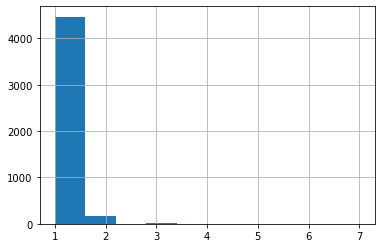

In [2342]:
x_train.TotalCharges.value_counts().hist()
x_train.TotalCharges.describe()

In [2343]:
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling']:
    x_train[col] = x_train[col].astype('category')
    x_val[col] = x_val[col].astype('category')

## Question 4. Feature selection - running log model 

In [2344]:
basicvariables = ['tenure','SeniorCitizen','MonthlyCharges', 'TotalCharges']

In [2345]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [2346]:
log_model = LG(random_state = 10).fit(x_train[basicvariables], y_train)

In [2347]:
abc=log_model.coef_[0]
for x, y in zip(basicvariables, abc):
    print(x, ":", y)

tenure : -0.07015504654274171
SeniorCitizen : 0.9518411173372784
MonthlyCharges : 0.023376558156366748
TotalCharges : 0.00018462937550495911


In [2348]:
log_model = LGCV(random_state = 10, cv=5).fit(x_train[basicvariables], y_train)

In [2349]:
#Default regularization parameter at Cs=10
param= float(log_model.C_)
print(param)

0.3593813663804626


In [2350]:
train_pred = log_model.predict(x_train[basicvariables])
val_pred = log_model.predict(x_val[basicvariables])

In [2351]:
#Accuracy:

train_acc = metrics.accuracy_score(y_train, train_pred)
val_acc = metrics.accuracy_score(y_val, val_pred)

print("The training dataset accuracy is ",train_acc, "\n","The validation accuracy is ", val_acc, sep="")

#Precision

train_prec = metrics.precision_score(y_train, train_pred, pos_label='Yes')
val_prec = metrics.precision_score(y_val, val_pred, pos_label='Yes')

print("The training dataset precision is ",train_prec, "\n","The validation precision is ", val_prec, sep="")

#Recall

train_rec = metrics.recall_score(y_train, train_pred, pos_label='Yes')
val_rec = metrics.recall_score(y_val, val_pred, pos_label='Yes')

print("The training dataset recall is " , train_rec, "\n","The validation recall is " , val_rec, sep="")

#AUC 

y_train_predprob = log_model.predict_proba(x_train[basicvariables])
y_val_predprob = log_model.predict_proba(x_val[basicvariables])

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob[:,1], pos_label = 'Yes')
print("The training dataset AUC is ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_predprob[:,1], pos_label = 'Yes')
print("The validation dataset AUC is ", metrics.auc(fpr, tpr))

The training dataset accuracy is 0.7910750507099391
The validation accuracy is 0.7846663511594889


In [2355]:
#Redo with no penalty

log_model = LG(random_state = 10, penalty='none').fit(x_train[basicvariables], y_train)
train_pred = log_model.predict(x_train[basicvariables])
val_pred = log_model.predict(x_val[basicvariables])

In [2356]:
#Accuracy:

train_acc = metrics.accuracy_score(y_train, train_pred)
val_acc = metrics.accuracy_score(y_val, val_pred)

print("The training dataset accuracy is ",train_acc, "\n","The validation accuracy is ", val_acc, sep="")

#Precision

train_prec = metrics.precision_score(y_train, train_pred, pos_label='Yes')
val_prec = metrics.precision_score(y_val, val_pred, pos_label='Yes')

print("The training dataset precision is ",train_prec, "\n","The validation precision is ", val_prec, sep="")

#Recall

train_rec = metrics.recall_score(y_train, train_pred, pos_label='Yes')
val_rec = metrics.recall_score(y_val, val_pred, pos_label='Yes')

print("The training dataset recall is " , train_rec, "\n","The validation recall is " , val_rec, sep="")

#AUC 

y_train_predprob = log_model.predict_proba(x_train[basicvariables])
y_val_predprob = log_model.predict_proba(x_val[basicvariables])

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob[:,1], pos_label = 'Yes')
print("The training dataset AUC is ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_predprob[:,1], pos_label = 'Yes')
print("The validation dataset AUC is ", metrics.auc(fpr, tpr))

print('From these results, I can see that by removing the penalty, there is nominal change in the evaluation metrics. The changes however did lead to overall a decrease in accuracy, precision, and AUC when the L1 penalty is not used.')

The training dataset accuracy is 0.7912778904665314
The validation accuracy is 0.7846663511594889
The training dataset precision is 0.6536430834213305
The validation precision is 0.6169154228855721
The training dataset recall is 0.46893939393939393
The validation recall is 0.4517304189435337
The training dataset AUC is  0.8133836984806513
The validation dataset AUC is  0.8105704862130169
From these results, I can see that by removing the penalty, there is nominal change in the evaluation metrics. The changes however did lead to overall a decrease in accuracy, precision, and AUC when the L1 penalty is not used.


In [2358]:
param=int(param)
log_model = LGCV(penalty='l2', solver='liblinear', random_state = 10, cv=5).fit(x_train[basicvariables], y_train)
train_pred = log_model.predict(x_train[basicvariables])
val_pred = log_model.predict(x_val[basicvariables])

In [2359]:
#Accuracy:

train_acc = metrics.accuracy_score(y_train, train_pred)
val_acc = metrics.accuracy_score(y_val, val_pred)

print("The training dataset accuracy is ",train_acc, "\n","The validation accuracy is ", val_acc, sep="")

#Precision

train_prec = metrics.precision_score(y_train, train_pred, pos_label='Yes')
val_prec = metrics.precision_score(y_val, val_pred, pos_label='Yes')

print("The training dataset precision is ",train_prec, "\n","The validation precision is ", val_prec, sep="")

#Recall

train_rec = metrics.recall_score(y_train, train_pred, pos_label='Yes')
val_rec = metrics.recall_score(y_val, val_pred, pos_label='Yes')

print("The training dataset recall is " , train_rec, "\n","The validation recall is " , val_rec, sep="")

#AUC 

y_train_predprob = log_model.predict_proba(x_train[basicvariables])
y_val_predprob = log_model.predict_proba(x_val[basicvariables])

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob[:,1], pos_label = 'Yes')
print("The training dataset AUC is ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_predprob[:,1], pos_label = 'Yes')
print("The validation dataset AUC is ", metrics.auc(fpr, tpr))

The training dataset accuracy is 0.7918864097363083
The validation accuracy is 0.7846663511594889
The training dataset precision is 0.6563829787234042
The validation precision is 0.6175
The training dataset recall is 0.4674242424242424
The validation recall is 0.44990892531876137
The training dataset AUC is  0.8134298665323595
The validation dataset AUC is  0.8106846207240321


## Question 5. Additional features 

In [2360]:
dummies = pd.get_dummies(x_train['Contract'])
x_train = x_train.join(dummies)
dummies = pd.get_dummies(x_val['Contract'])
x_val = x_val.join(dummies)

In [2361]:
dummies = pd.get_dummies(x_train['PaymentMethod'])
x_train = x_train.join(dummies)
dummies = pd.get_dummies(x_val['PaymentMethod'])
x_val = x_val.join(dummies)

In [2362]:
dummies = pd.get_dummies(x_train['InternetService'])
x_train = x_train.join(dummies)
dummies = pd.get_dummies(x_val['InternetService'])
x_val = x_val.join(dummies)

In [2363]:
dummies = pd.get_dummies(x_train['StreamingMovies'], prefix=['StreamingMovies'])
x_train = x_train.join(dummies)
dummies = pd.get_dummies(x_val['StreamingMovies'], prefix=['StreamingMovies'])
x_val = x_val.join(dummies)

In [2371]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'PaperlessBilling',
       'MonthlyCharges', 'Month-to-month', 'One year', 'Two year',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', 'DSL', 'Fiber optic', 'No',
       '['StreamingMovies']_No', '['StreamingMovies']_No internet service',
       '['StreamingMovies']_Yes'],
      dtype='object')

In [2364]:
x_train = x_train.drop(['Contract', 'PaymentMethod','InternetService','StreamingMovies',],axis=1)
x_val = x_val.drop(['Contract', 'PaymentMethod','InternetService','StreamingMovies'], axis=1)

In [2365]:
basicvariables = ['tenure','SeniorCitizen','MonthlyCharges', 'TotalCharges','Month-to-month', 'One year',
       'Two year', 'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', 'DSL', 'Fiber optic', 'No',
       "['StreamingMovies']_No", "['StreamingMovies']_No internet service",
       "['StreamingMovies']_Yes"]

In [2366]:
log_model = LGCV(penalty='l2', solver='liblinear', random_state = 10, cv=5).fit(x_train[basicvariables], y_train)
train_pred = log_model.predict(x_train[basicvariables])
val_pred = log_model.predict(x_val[basicvariables])

#Accuracy:

train_acc = metrics.accuracy_score(y_train, train_pred)
val_acc = metrics.accuracy_score(y_val, val_pred)

print("The training dataset accuracy is ",train_acc, "\n","The validation accuracy is ", val_acc, sep="")

#Precision

train_prec = metrics.precision_score(y_train, train_pred, pos_label='Yes')
val_prec = metrics.precision_score(y_val, val_pred, pos_label='Yes')

print("The training dataset precision is ",train_prec, "\n","The validation precision is ", val_prec, sep="")

#Recall

train_rec = metrics.recall_score(y_train, train_pred, pos_label='Yes')
val_rec = metrics.recall_score(y_val, val_pred, pos_label='Yes')

print("The training dataset recall is " , train_rec, "\n","The validation recall is " , val_rec, sep="")

#AUC 

y_train_predprob = log_model.predict_proba(x_train[basicvariables])
y_val_predprob = log_model.predict_proba(x_val[basicvariables])

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob[:,1], pos_label = 'Yes')
print("The training dataset AUC is ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_predprob[:,1], pos_label = 'Yes')
print("The validation dataset AUC is ", metrics.auc(fpr, tpr))

The training dataset accuracy is 0.8004056795131845
The validation accuracy is 0.7988641741599621
The training dataset precision is 0.6612284069097889
The validation precision is 0.6336206896551724
The training dataset recall is 0.521969696969697
The validation recall is 0.5355191256830601
The training dataset AUC is  0.8341879669268867
The validation dataset AUC is  0.8345596970078124


In [2367]:
x_train.corr()

,tenure,MonthlyCharges,TotalCharges,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic,No,['StreamingMovies']_No,['StreamingMovies']_No internet service,['StreamingMovies']_Yes
tenure,1.000000,0.238018,0.822849,-0.647347,0.197657,0.563264,0.248550,0.240123,-0.215725,-0.234685,0.017428,0.014396,-0.037514,-0.240545,-0.037514,0.272286
MonthlyCharges,0.238018,1.000000,0.647954,0.066650,0.005660,-0.082366,0.039193,0.033207,0.281371,-0.383098,-0.156050,0.785545,-0.766134,0.015902,-0.766134,0.630065
TotalCharges,0.822849,0.647954,1.000000,-0.442661,0.168148,0.354251,0.189559,0.187522,-0.059443,-0.300029,-0.048046,0.359792,-0.378008,-0.192236,-0.378008,0.511046
Month-to-month,-0.647347,0.066650,-0.442661,1.000000,-0.560694,-0.630817,-0.185834,-0.198785,0.333678,0.002417,-0.072806,0.251843,-0.219265,0.293748,-0.219265,-0.109008
One year,0.197657,0.005660,0.168148,-0.560694,1.000000,-0.288794,0.045655,0.070292,-0.105902,0.005302,0.052940,-0.080717,0.036021,-0.087829,0.036021,0.057498
Two year,0.563264,-0.082366,0.354251,-0.630817,-0.288794,1.000000,0.172085,0.163972,-0.286571,-0.007763,0.034571,-0.215550,0.219767,-0.257339,0.219767,0.072158
Bank transfer (automatic),0.248550,0.039193,0.189559,-0.185834,0.045655,0.172085,1.000000,-0.275676,-0.375001,-0.294156,0.019901,-0.021901,0.003367,-0.051617,0.003367,0.048802
Credit card (automatic),0.240123,0.033207,0.187522,-0.198785,0.070292,0.163972,-0.275676,1.000000,-0.366785,-0.287712,0.072081,-0.060028,-0.011060,-0.049709,-0.011060,0.059057
Electronic check,-0.215725,0.281371,-0.059443,0.333678,-0.105902,-0.286571,-0.375001,-0.366785,1.000000,-0.391373,-0.119496,0.352097,-0.286063,0.102180,-0.286063,0.138971
Mailed check,-0.234685,-0.383098,-0.300029,0.002417,0.005302,-0.007763,-0.294156,-0.287712,-0.391373,1.000000,0.043848,-0.312081,0.325367,-0.015197,0.325367,-0.259132


In [2369]:
x_train = x_train.drop(['TotalCharges'],axis=1)
x_val = x_val.drop(['TotalCharges'], axis=1)
basicvariables = ['tenure','SeniorCitizen','MonthlyCharges','Month-to-month', 'One year',
       'Two year', 'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', 'DSL', 'Fiber optic', 'No',
       "['StreamingMovies']_No", "['StreamingMovies']_No internet service",
       "['StreamingMovies']_Yes"]

In [2370]:
log_model = LGCV(penalty='l2', solver='liblinear', random_state = 10, cv=5).fit(x_train[basicvariables], y_train)
train_pred = log_model.predict(x_train[basicvariables])
val_pred = log_model.predict(x_val[basicvariables])

#Accuracy:

train_acc = metrics.accuracy_score(y_train, train_pred)
val_acc = metrics.accuracy_score(y_val, val_pred)

print("The training dataset accuracy is ",train_acc, "\n","The validation accuracy is ", val_acc, sep="")

#Precision

train_prec = metrics.precision_score(y_train, train_pred, pos_label='Yes')
val_prec = metrics.precision_score(y_val, val_pred, pos_label='Yes')

print("The training dataset precision is ",train_prec, "\n","The validation precision is ", val_prec, sep="")

#Recall

train_rec = metrics.recall_score(y_train, train_pred, pos_label='Yes')
val_rec = metrics.recall_score(y_val, val_pred, pos_label='Yes')

print("The training dataset recall is " , train_rec, "\n","The validation recall is " , val_rec, sep="")

#AUC 

y_train_predprob = log_model.predict_proba(x_train[basicvariables])
y_val_predprob = log_model.predict_proba(x_val[basicvariables])

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predprob[:,1], pos_label = 'Yes')
print("The training dataset AUC is ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_predprob[:,1], pos_label = 'Yes')
print("The validation dataset AUC is ", metrics.auc(fpr, tpr))

The training dataset accuracy is 0.8018255578093306
The validation accuracy is 0.7988641741599621
The training dataset precision is 0.6660212971926428
The validation precision is 0.6359649122807017
The training dataset recall is 0.5212121212121212
The validation recall is 0.5282331511839709
The training dataset AUC is  0.8380316670863763
The validation dataset AUC is  0.8407596466954564


#### Looking for ways to improve the performance of the model, I did one hot encoding to map some categorical variables to binary columns that the model could use to train. After doing so, I looked at the correlation between variables as highly correlated variables can lead to lower performance in logistic regression. By dropping the 'TotalCharges' column, which had high correlation with other variables, all metrics improved to display increased model performance. There are multiple ways to measure the performance of this model through accuracy, precision, recall, and AUC. Accuracy shows how many correct predictions were made by total predictions made, precision details the proportion of how many correct positive "1"s were guessed out of all "1"s. I believe that examining the AUC score may be the best metric to evaluate the performance of the model because the question behind the reasoning of the model is "will a customer churn?" As the AUC score of the model has improved through feature engineering to around 83%, that score tells that the model's predictions are helpful in answering whether a customer may churn. 

## Question 6. Advantages & disadvantages of logistic regression 

#### Using logistic regression on this dataset has its pros and cons. One benefit is that by using logistic regression, it is easy for the user/developer to understand the model's predictions compared to other regressions. As logisitc regression uses the basis of 1 or 0, it is easier to grasp why the features of the model would influence the model to make it's decision instead of the infinity answers a linear regression could give instead. However, a disadvantage of using logisitic regression is that it does not handle nonlinearity as well as other models, therefore more feature engineering is (usually) needed for increased performance. Additionally, logisitc models do not handle highly correlated variables well, and they can lead to worsening performance for the model. This was proven by the correlations I saw between 'TotalCharges' and other variables like monthlycharges, tenure, etc. After dropping 'TotalCharges,' the model improved, which was not something I would necessarily expect.